In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np

In [2]:
tda = pd.read_csv("/data/KNW/KNW-stage/m.schepers/HCP/TDA_features_HCP.csv")
bd = pd.read_csv("/data/KNW/KNW-stage/m.schepers/HCP/Cog_data/BD_100.csv")

In [3]:
tda.shape

(724, 98)

In [4]:
tda.head()

,Subject,Euler_sum,Phase_transition_1,Phase_transition_2,S_entropy_dim0,S_entropy_dim1,bc_AUC_dim0,bc_AUC_dim1,curv_ent_DMN_0.01,curv_ent_DMN_0.02,...,p4cliques_FPN_ent_p2high,p4cliques_FPN_ent_p2low,p4cliques_FPN_sum_p2high,p4cliques_FPN_sum_p2low,pl_AUC_dim0,pl_AUC_dim1,top_vec_dim0,top_vec_dim1,total_cliques_sum,triangles_sum
0,HCA9044570,-59210.0,6.0,80.0,99.601976,30.008512,16875.252525,362.626263,3.927469,4.166546,...,-18.349108,-14.973615,8.550443,7.454128,28.353649,2.959655,0.420333,0.082331,650124.0,258532.0
1,HCA6119257,-19951.0,6.0,70.0,110.890051,40.418321,13894.444444,422.222222,4.021539,4.141174,...,-6.922183,-5.382192,4.561268,3.931452,31.637863,2.519510,0.452474,0.051879,809545.0,351806.0
2,HCA8623581,-55565.0,6.0,81.0,89.951061,32.961148,18047.979798,474.747475,3.986274,4.144941,...,-26.556982,-22.063991,11.052976,9.707447,30.059436,4.556022,0.436833,0.136628,638279.0,254987.0
3,HCA6606571,-64477.0,6.0,82.0,109.605101,34.968034,13820.707071,532.323232,4.013586,4.231460,...,-19.187957,-15.943992,8.815789,7.774390,29.056496,4.403267,0.422280,0.117863,631249.0,246859.0
4,HCA7438480,-63974.0,6.0,82.0,76.070075,53.298140,21613.636364,497.979798,4.002483,4.269810,...,-27.332814,-21.422618,11.280298,9.510870,29.548871,1.546948,0.434180,0.070141,628880.0,245894.0


In [39]:
same = bd['Subject'].isin(tda['Subject'])
print(same.value_counts())
bd.drop(bd[~same].index, inplace = True)
bd = bd.reset_index(drop=True)

True     98
False     2
Name: Subject, dtype: int64


In [40]:
# Sort tda by subject and reset index before concatenating
tda.sort_values(by=['Subject'], inplace=True)
tda.reset_index(drop=True, inplace=True)
print(tda['Subject'])

0     100307
1     100408
2     101107
3     101309
4     101915
       ...  
93    756055
94    792564
95    856766
96    857263
97    899885
Name: Subject, Length: 98, dtype: int64


In [41]:
print(bd.shape)
print(tda.shape)
df = pd.concat([bd, tda], axis=1)
print(df.shape)

(98, 583)
(98, 102)
(98, 685)


In [42]:
df['EF_AgeAdj'] = df[['Flanker_AgeAdj', 'CardSort_AgeAdj']].mean(axis=1)
df['EF_Unadj'] = df[['Flanker_Unadj', 'CardSort_Unadj']].mean(axis=1)

In [43]:
tda_features = tda.columns[1:]

subject_information = ['Subject',  'Gender', 'Age']

cog_start = df.columns.get_loc('PicSeq_Unadj')
cog_end = df.columns.get_loc('SelfEff_Unadj')
cognition = df.columns[cog_start:cog_end]
cognition_adjusted = [i for i in cognition if 'AgeAdj' in i]

WM = ['ListSort_Unadj', 'ListSort_AgeAdj']
EF = ['CardSort_Unadj', 'CardSort_AgeAdj',
       'Flanker_Unadj', 'Flanker_AgeAdj',
      'EF_Unadj', 'EF_AgeAdj']

In [44]:
DMN_curvatures = [i for i in tda_features if 'DMN' in i if 'curv' in i]
FPN_curvatures = [i for i in tda_features if 'FPN' in i if 'curv' in i]
all_curvatures = [i for i in tda_features if 'all' in i if 'curv' in i]
global_features = ['Euler_sum', 'Phase_transition_1', 'Phase_transition_2',
       'S_entropy_dim0', 'S_entropy_dim1', 'S_entropy_dim2', 'bc_AUC_dim0',
       'bc_AUC_dim1', 'bc_AUC_dim2', 'pl_AUC_dim0', 'pl_AUC_dim1', 'pl_AUC_dim2',
       'top_vec_dim0', 'top_vec_dim1', 'top_vec_dim2', 'total_cliques_sum',
       'triangles_sum']
p3_cliques = [i for i in tda_features if 'p3cliques' in i]
p4_cliques = [i for i in tda_features if 'p4cliques' in i]

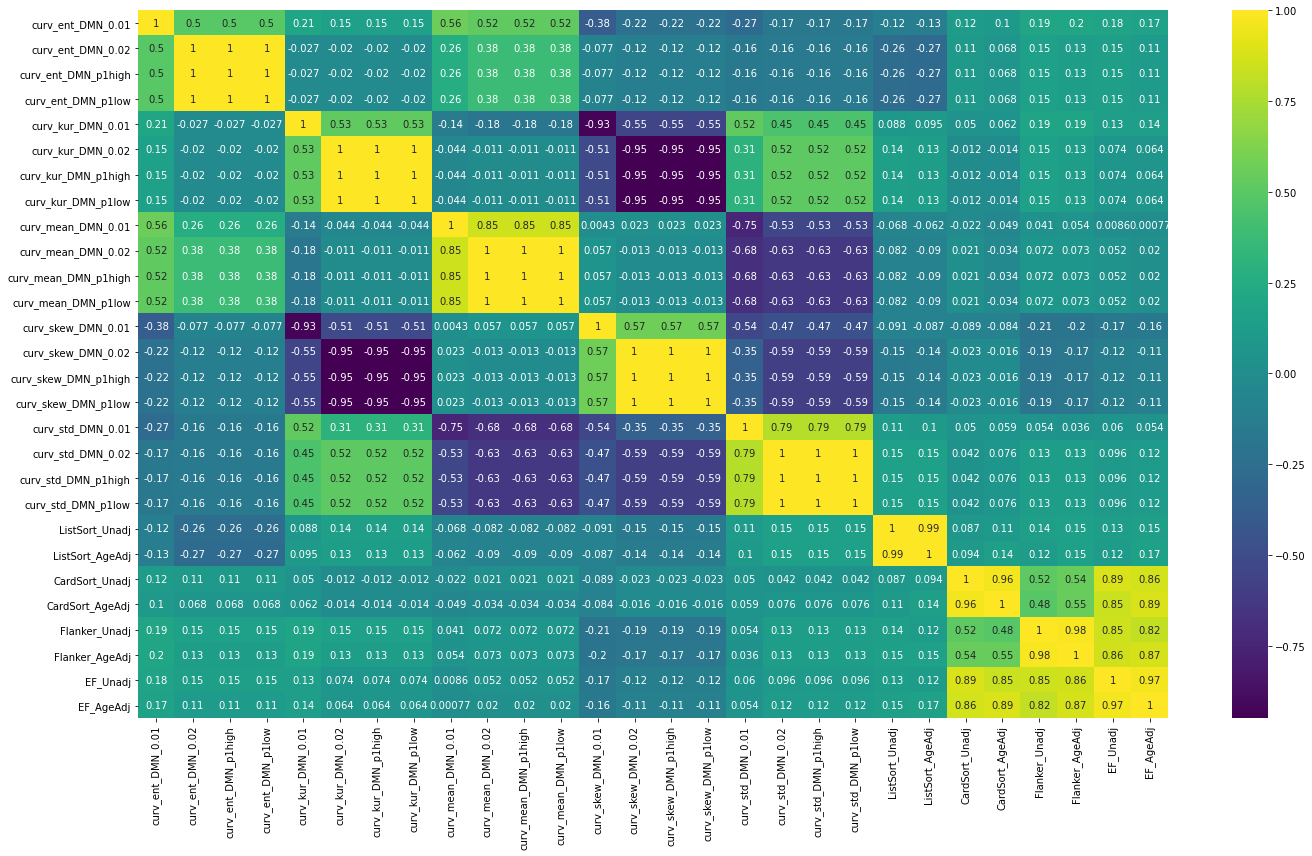

In [45]:
to_compare = DMN_curvatures + WM + EF
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()

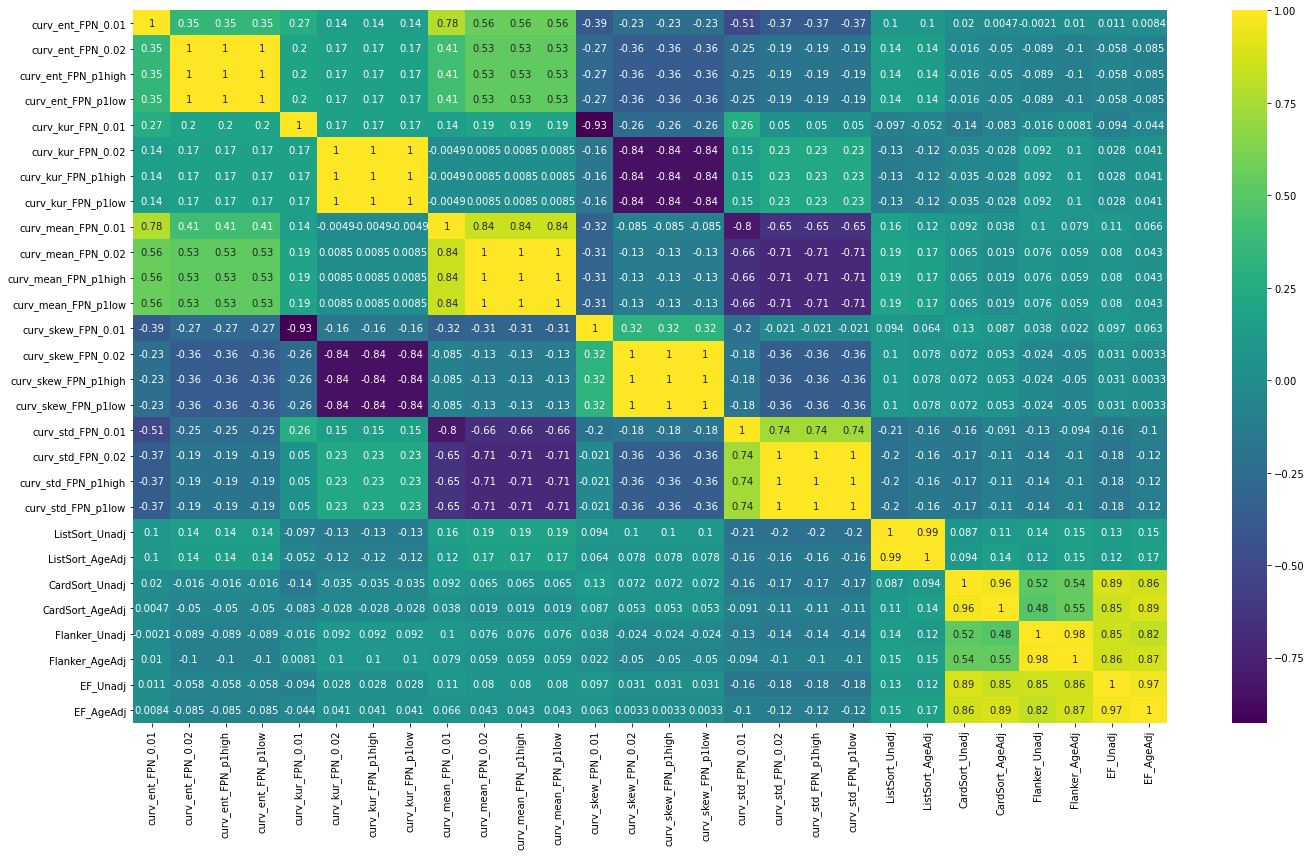

In [46]:
to_compare = FPN_curvatures + WM + EF
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()

Data exploration

In [47]:
def regplot(X_column, y_column, df):
    X = df[X_column]
    y = df[y_column]

    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    p_value = round(est2.pvalues[1], 5)
    R2 = round(est2.rsquared, 5)

    sns.regplot(x=X, y=y)
    plt.figtext(0.72, 0.78, f' R2: {R2} \n p: {p_value}', fontsize=10)
    plt.xlabel(X_column)
    plt.ylabel(y_column)
    plt.show()

In [48]:
def z_scored_df(df, X_column, cut_off, print_zscores):
    z_scored = np.abs(stats.zscore(df[X_column]))
    if print_zscores == 1:
        print(z_scored)
    filtered = (z_scored < cut_off)#.all(axis=1)
    df_new = df[filtered]
    print(f'Shape old df: {df.shape}')
    print(f'Shape new df: {df_new.shape}')
    return df_new

In [49]:
def z_scored_regplot(x, y, dataframe, cut_off, print_zscores):
    X_column = x
    y = y
    df = dataframe
    
    regplot(X_column, y, z_scored_df(df, X_column, cut_off=cut_off, print_zscores=print_zscores))

In [50]:
def get_best_predictors(x, y, dataframe, n):
        
    # This function gets the n best predictors for a target and produces regression plots
    
    print(f'\n---------------- y = {y} ----------------\n')
    df = dataframe
    columns = []
    
    [columns.append(i) for i in x]
    columns.append(y)

    # Create correlation matrix
    corr = df[columns].corr()
    # Only include column with corr values with y-column, and exclude row with y (autocorrelation)
    # Absolutize to also get large negative correlation values
    corr = np.abs(corr.iloc[:-1,-1:])
    # Get n largest corr values
    corr = corr.nlargest(n, corr.columns)
    print(corr)
    # Save predictors to list
    best_predictors = corr.index.to_list()
    # Make for each predictor regression plot
    [regplot(predictor, y, df) for predictor in best_predictors]
    
# get_best_predictors(global_features, 'ListSort_Unadj', 3)

In [51]:
tda_features
selected_features = list(tda_features)
to_remove = ['curv_mean_all_0.01', 'curv_mean_all_0.02']
[selected_features.remove(i) for i in to_remove]

[None, None]


---------------- y = ListSort_Unadj ----------------

                         ListSort_Unadj
p4cliques_FPN_ent_p2low        0.280629
p4cliques_FPN_sum_p2low        0.279742
curv_ent_DMN_0.02              0.261002
curv_ent_DMN_p1high            0.261002
curv_ent_DMN_p1low             0.261002


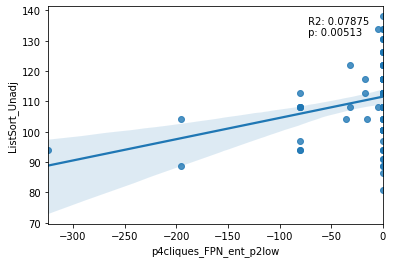

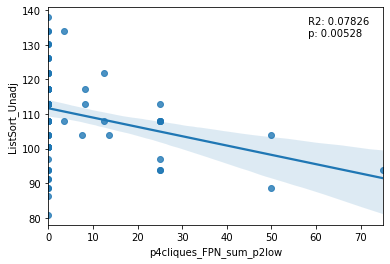

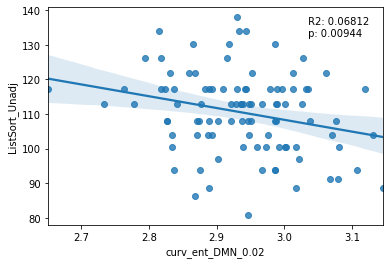

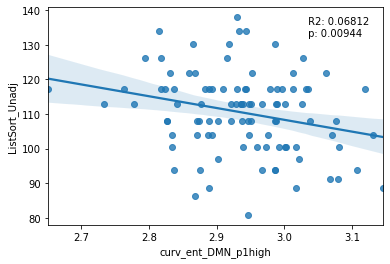

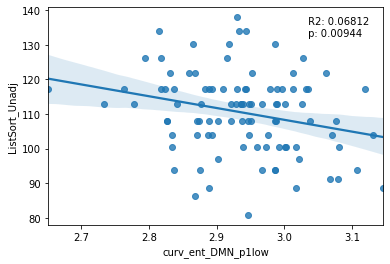


---------------- y = ListSort_AgeAdj ----------------

                         ListSort_AgeAdj
p4cliques_FPN_ent_p2low         0.284724
p4cliques_FPN_sum_p2low         0.284072
curv_ent_DMN_0.02               0.272891
curv_ent_DMN_p1high             0.272891
curv_ent_DMN_p1low              0.272891


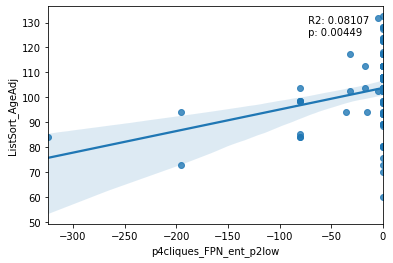

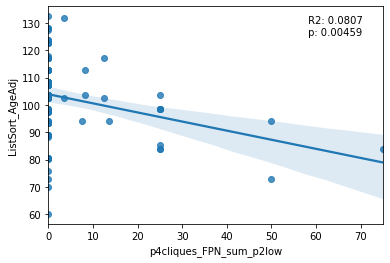

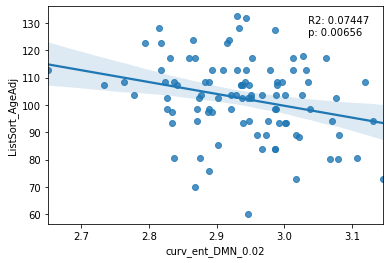

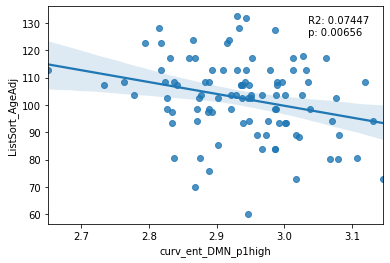

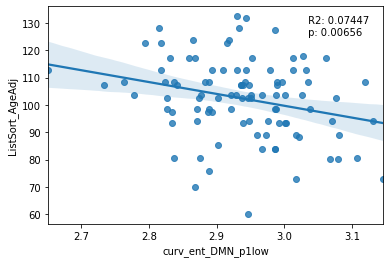


---------------- y = Flanker_Unadj ----------------

                      Flanker_Unadj
curv_skew_DMN_0.01         0.208388
curv_skew_DMN_0.02         0.193177
curv_skew_DMN_p1high       0.193177
curv_skew_DMN_p1low        0.193177
curv_ent_DMN_0.01          0.192956


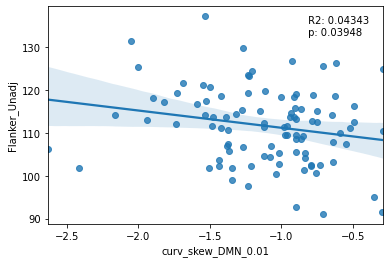

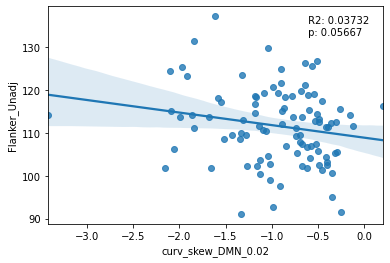

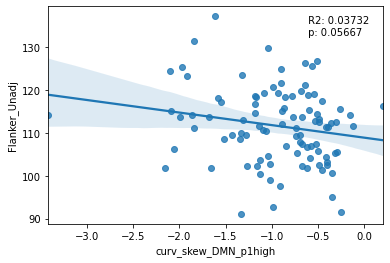

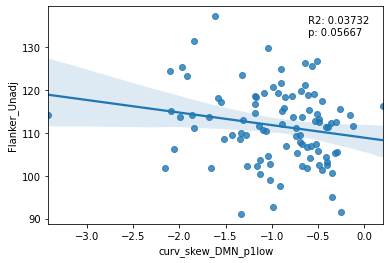

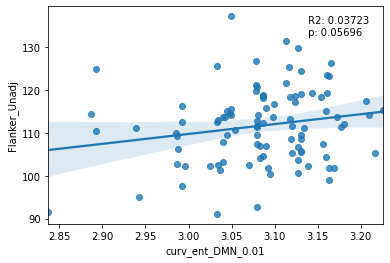


---------------- y = Flanker_AgeAdj ----------------

                      Flanker_AgeAdj
curv_ent_DMN_0.01           0.200480
curv_skew_DMN_0.01          0.199972
curv_kur_DMN_0.01           0.187271
curv_skew_DMN_0.02          0.173266
curv_skew_DMN_p1high        0.173266


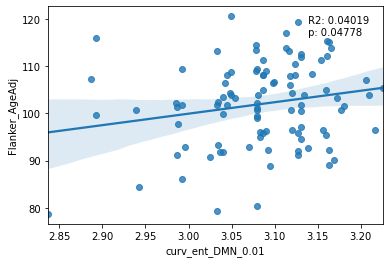

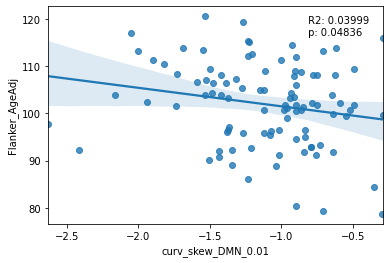

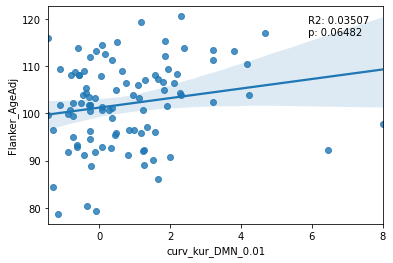

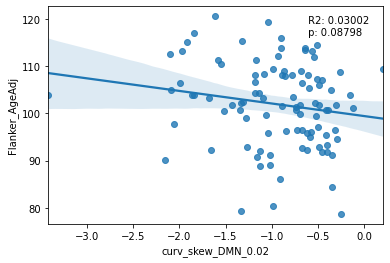

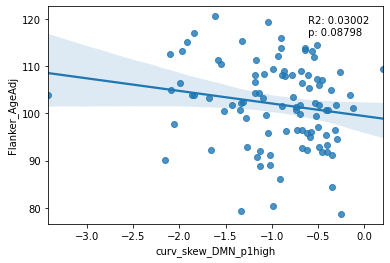


---------------- y = CardSort_Unadj ----------------

                     CardSort_Unadj
curv_kur_all_0.02          0.185641
curv_kur_all_p1high        0.185641
curv_kur_all_p1low         0.185641
triangles_sum              0.182016
curv_skew_all_0.02         0.179048


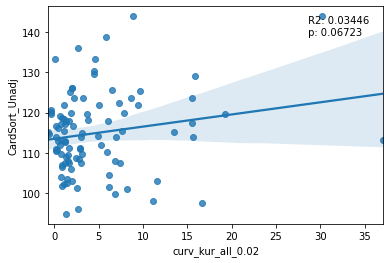

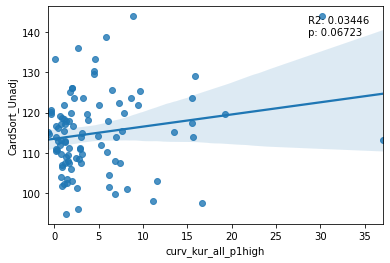

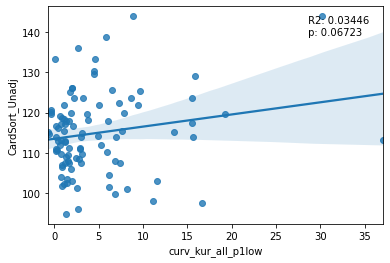

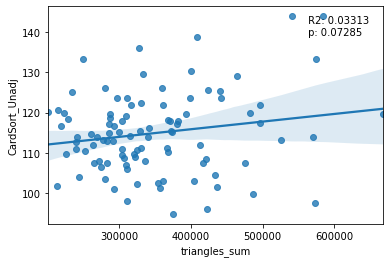

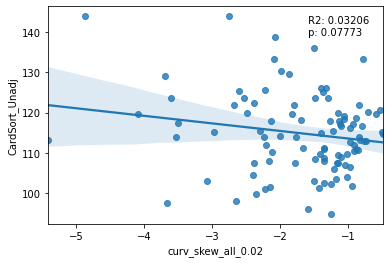


---------------- y = CardSort_AgeAdj ----------------

                          CardSort_AgeAdj
p4cliques_DMN_ent_p2high         0.176010
p4cliques_DMN_sum_p2high         0.173544
S_entropy_dim0                   0.171949
bc_AUC_dim0                      0.169870
top_vec_dim0                     0.146500


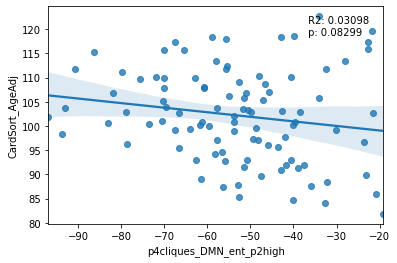

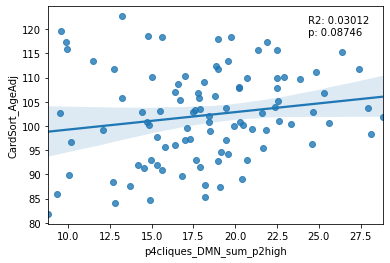

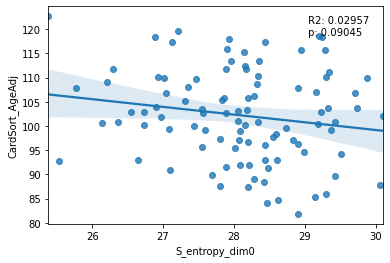

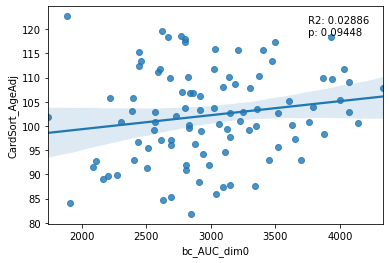

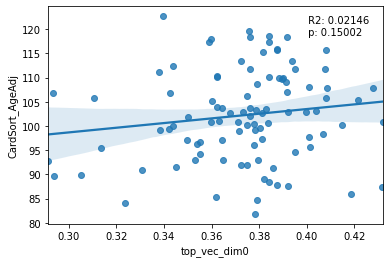


---------------- y = EF_AgeAdj ----------------

                     EF_AgeAdj
curv_ent_DMN_0.01     0.171571
curv_kur_all_0.02     0.162352
curv_kur_all_p1high   0.162352
curv_kur_all_p1low    0.162352
curv_skew_DMN_0.01    0.159080


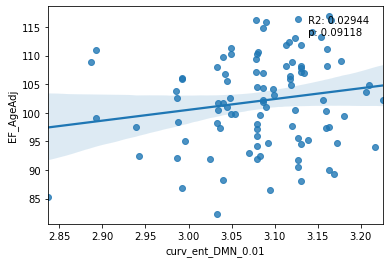

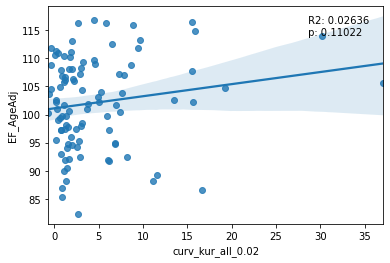

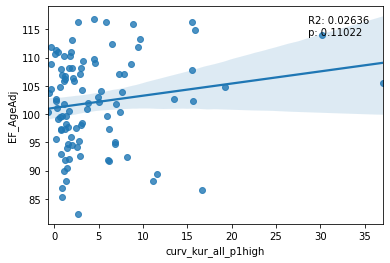

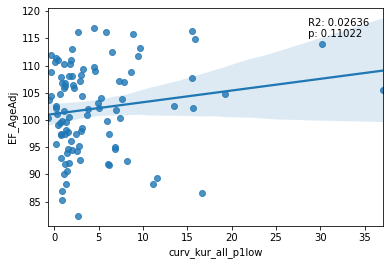

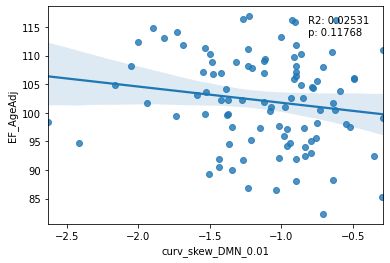

[None, None, None, None, None, None, None]

In [52]:
to_test = ['ListSort_Unadj', 'ListSort_AgeAdj',
           'Flanker_Unadj', 'Flanker_AgeAdj',
           'CardSort_Unadj', 'CardSort_AgeAdj',
           'EF_AgeAdj']
[get_best_predictors(tda_features, y, df, 5) for y in to_test]

# Best for ListSort

                          ListSort_AgeAdj
p4cliques_FPN_ent_p2low          0.284724
p4cliques_FPN_sum_p2low          0.284072
curv_ent_DMN_0.02                0.272891
p3cliques_FPN_ent_p2high         0.235881
p3cliques_FPN_sum_p2high         0.228096

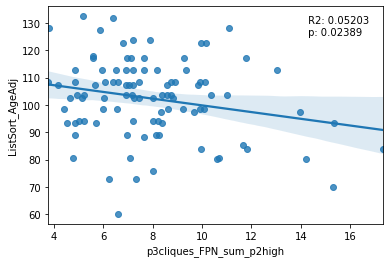

Shape old df: (98, 687)
Shape new df: (97, 687)


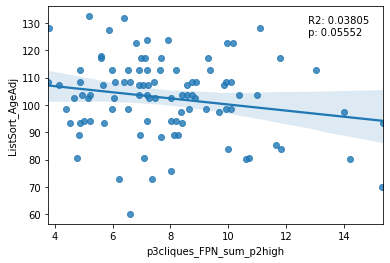

In [53]:
x = 'p3cliques_FPN_sum_p2high'
y = 'ListSort_AgeAdj'
regplot(x, y, df)
z_scored_regplot(x, y, df, cut_off=3, print_zscores = 0)

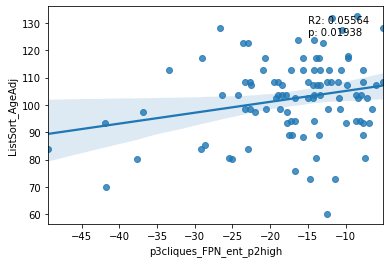

Shape old df: (98, 687)
Shape new df: (97, 687)


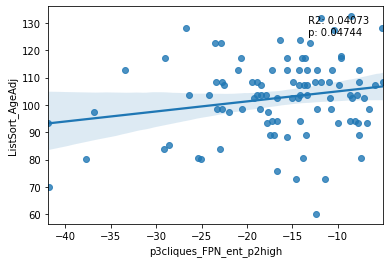

In [54]:
x = 'p3cliques_FPN_ent_p2high'
y = 'ListSort_AgeAdj'
regplot(x, y, df)
z_scored_regplot(x, y, df, cut_off=3, print_zscores = 0)

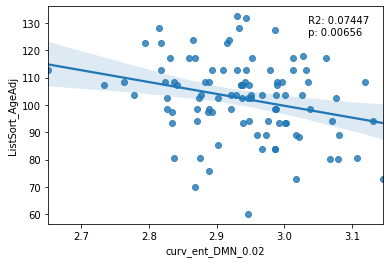

Shape old df: (98, 687)
Shape new df: (97, 687)


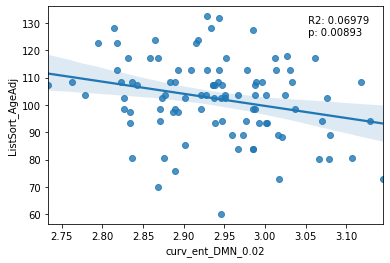

In [55]:
x = 'curv_ent_DMN_0.02'
y = 'ListSort_AgeAdj'
regplot(x, y, df)
z_scored_regplot(x, y, df, cut_off=3, print_zscores = 0)

# Best for Flanker

                    Flanker_Unadj
curv_skew_DMN_0.01       0.208388
curv_skew_DMN_0.02       0.193177
curv_ent_DMN_0.01        0.192956
curv_kur_DMN_0.01        0.192665
curv_std_FPN_p1low       0.183547

                    Flanker_AgeAdj
curv_ent_DMN_0.01         0.200480
curv_skew_DMN_0.01        0.199972
curv_kur_DMN_0.01         0.187271
curv_ent_DMN_p1low        0.185454
curv_skew_DMN_0.02        0.173266

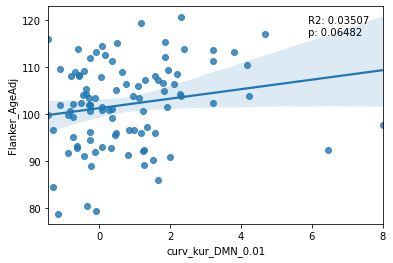

Shape old df: (98, 687)
Shape new df: (96, 687)


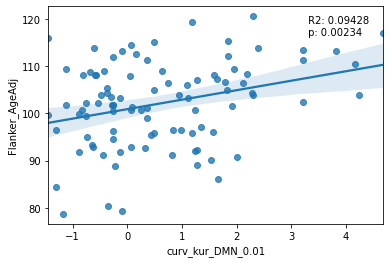

In [56]:
x = 'curv_kur_DMN_0.01'
y = 'Flanker_AgeAdj'
regplot(x, y, df)
z_scored_regplot(x, y, df, cut_off=3, print_zscores = 0)

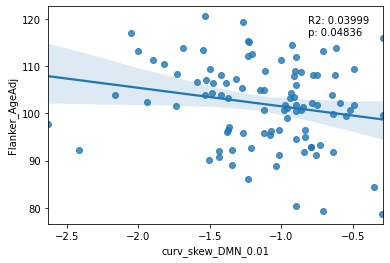

Shape old df: (98, 687)
Shape new df: (97, 687)


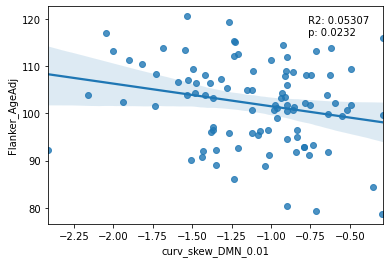

In [57]:
x = 'curv_skew_DMN_0.01'
y = 'Flanker_AgeAdj'
regplot(x, y, df)
z_scored_regplot(x, y, df, cut_off=3, print_zscores = 0)

# Best for CardSort

                          CardSort_AgeAdj
p4cliques_DMN_ent_p2high         0.176010
p4cliques_DMN_sum_p2high         0.173544
S_entropy_dim0                   0.171949
bc_AUC_dim0                      0.169870
top_vec_dim0                     0.146500

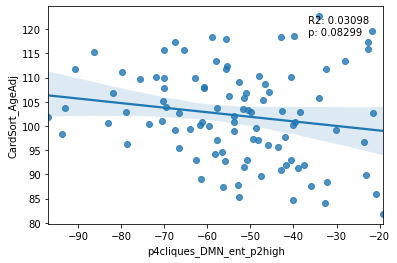

Shape old df: (98, 687)
Shape new df: (98, 687)


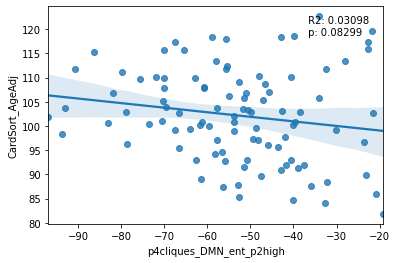

In [58]:
x = 'p4cliques_DMN_ent_p2high'
y = 'CardSort_AgeAdj'
regplot(x, y, df)
z_scored_regplot(x, y, df, cut_off=3, print_zscores = 0)

# Best for EF_AgeAdj

                    EF_AgeAdj
curv_ent_DMN_0.01    0.171571
curv_kur_all_0.02    0.162352
curv_skew_DMN_0.01   0.159080
curv_skew_all_0.02   0.156208
curv_std_FPN_p1low   0.151040

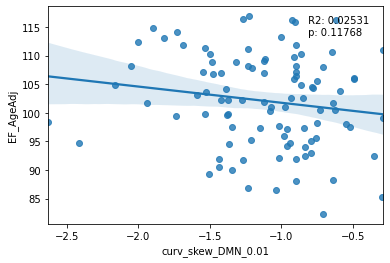

Shape old df: (98, 687)
Shape new df: (97, 687)


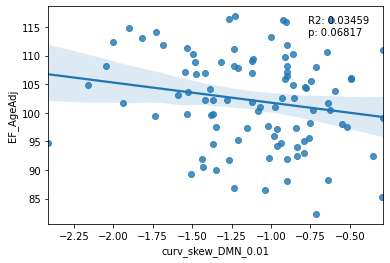

In [59]:
x = 'curv_skew_DMN_0.01'
y = 'EF_AgeAdj'
regplot(x, y, df)
z_scored_regplot(x, y, df, cut_off=3, print_zscores = 0)

In [60]:
df['Gender']
males = df[df['Gender'] == 'M']
females = df[df['Gender'] == 'F']

print(males.shape)
print(females.shape)

(44, 687)
(54, 687)


# Males vs Females


---------------- y = ListSort_AgeAdj ----------------

                     ListSort_AgeAdj
S_entropy_dim0              0.397118
top_vec_dim2                0.286209
curv_kur_DMN_0.02           0.260769
curv_kur_DMN_p1high         0.260769
curv_kur_DMN_p1low          0.260769


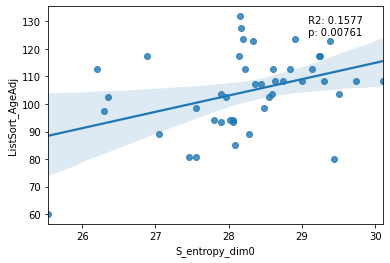

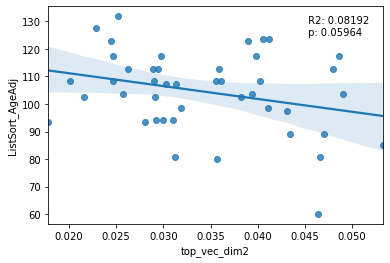

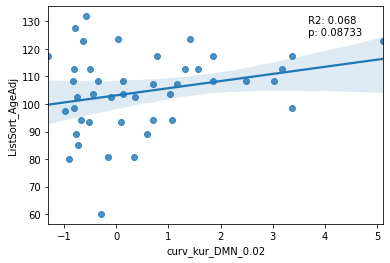

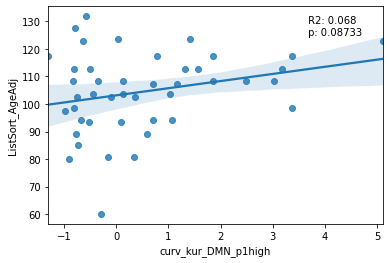

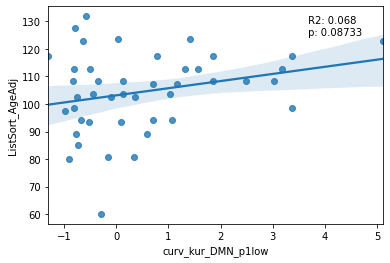


---------------- y = Flanker_AgeAdj ----------------

                     Flanker_AgeAdj
curv_skew_DMN_0.01         0.266043
curv_ent_FPN_0.02          0.253370
curv_ent_FPN_p1high        0.253370
curv_ent_FPN_p1low         0.253370
curv_ent_DMN_0.01          0.233314


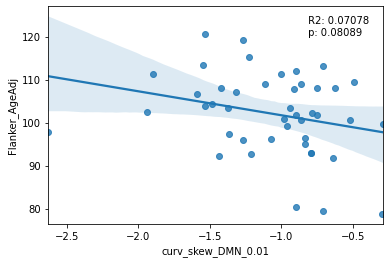

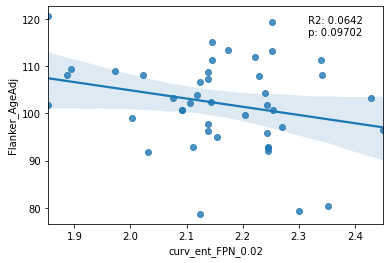

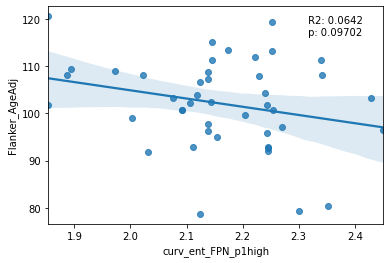

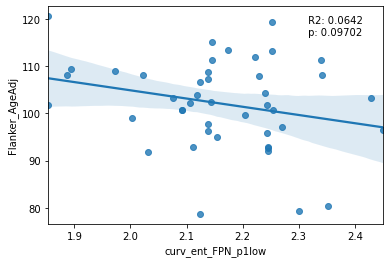

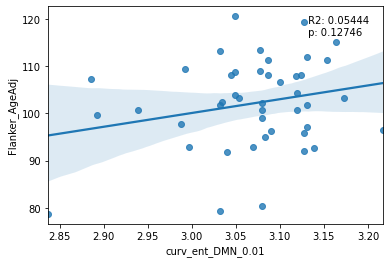


---------------- y = CardSort_AgeAdj ----------------

                     CardSort_AgeAdj
S_entropy_dim1              0.415362
bc_AUC_dim1                 0.307122
curv_std_DMN_0.02           0.305169
curv_std_DMN_p1high         0.305169
curv_std_DMN_p1low          0.305169


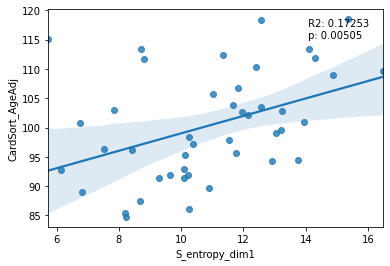

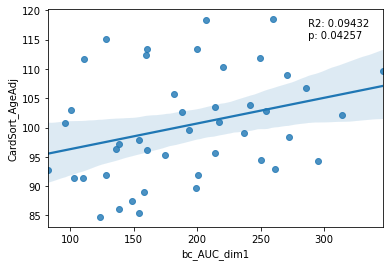

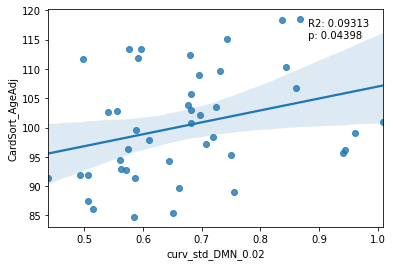

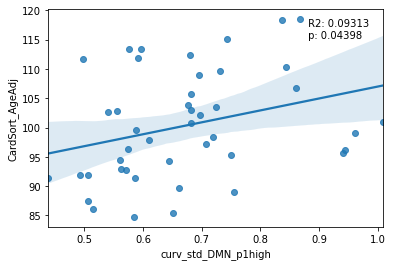

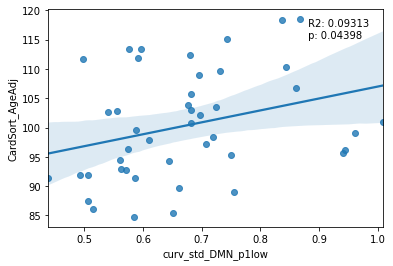


---------------- y = EF_AgeAdj ----------------

                         EF_AgeAdj
S_entropy_dim1            0.300948
curv_skew_DMN_0.01        0.267193
p4cliques_FPN_ent_p2low   0.242904
bc_AUC_dim1               0.234224
curv_std_all_0.02         0.232318


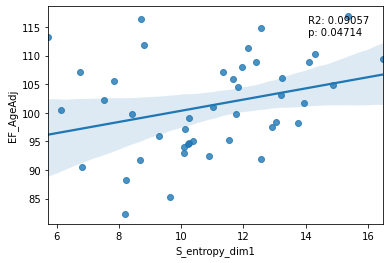

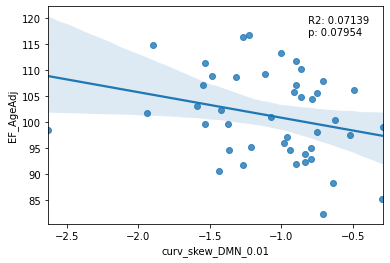

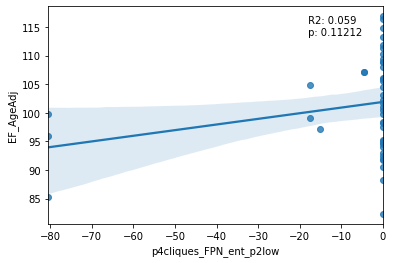

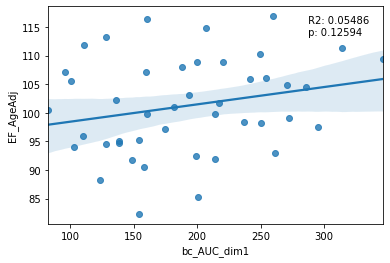

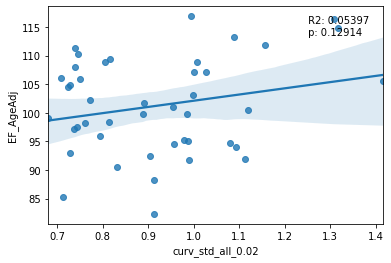

[None, None, None, None]

In [61]:
to_test = ['ListSort_AgeAdj',
           'Flanker_AgeAdj',
           'CardSort_AgeAdj',
           'EF_AgeAdj']
[get_best_predictors(tda_features, y, males, 5) for y in to_test]


---------------- y = ListSort_AgeAdj ----------------

                          ListSort_AgeAdj
p3cliques_FPN_sum_p2low          0.379553
p3cliques_FPN_ent_p2low          0.373058
p3cliques_FPN_ent_p2high         0.370088
p3cliques_FPN_sum_p2high         0.368843
bc_AUC_dim1                      0.339375


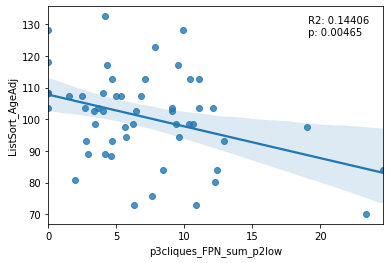

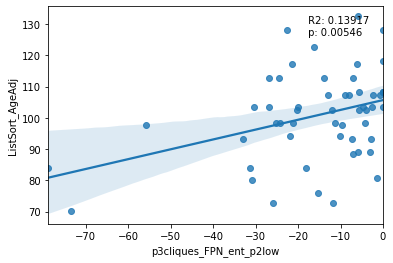

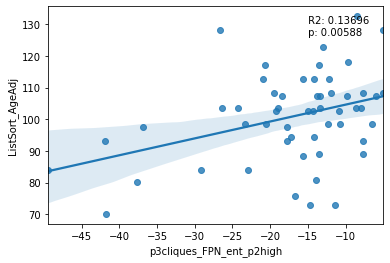

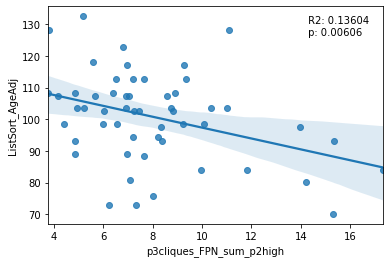

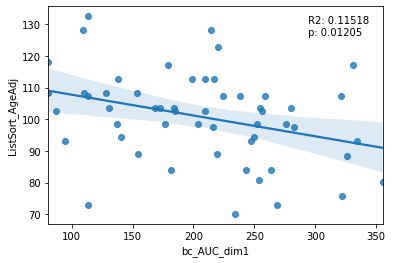


---------------- y = Flanker_AgeAdj ----------------

                   Flanker_AgeAdj
curv_ent_all_0.01        0.329127
bc_AUC_dim2              0.303045
S_entropy_dim2           0.299926
bc_AUC_dim1              0.273452
Euler_sum                0.228857


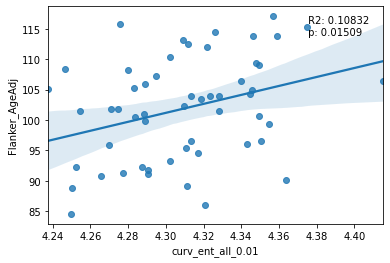

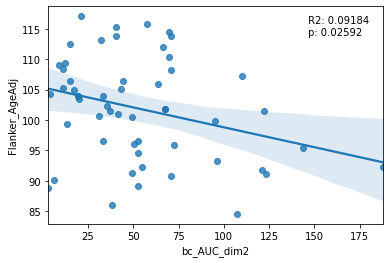

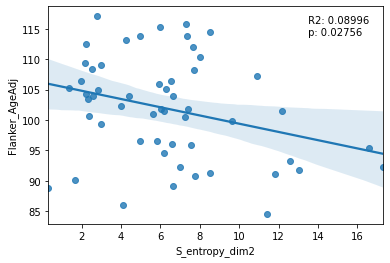

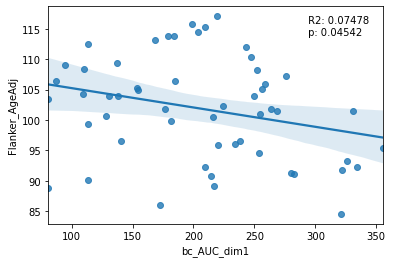

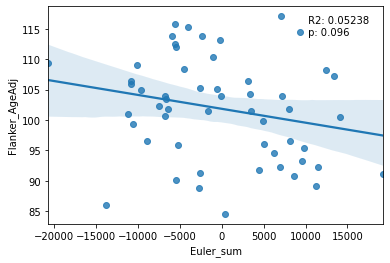


---------------- y = CardSort_AgeAdj ----------------

                          CardSort_AgeAdj
curv_skew_FPN_0.01               0.278623
curv_kur_FPN_0.01                0.225176
top_vec_dim0                     0.172269
p4cliques_DMN_ent_p2high         0.171023
p4cliques_DMN_sum_p2high         0.168998


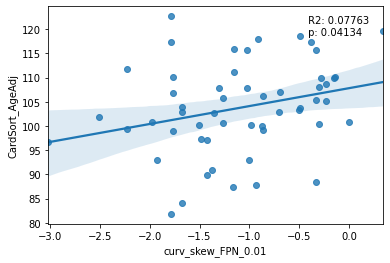

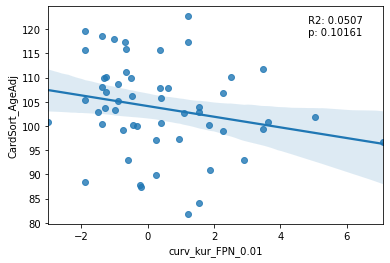

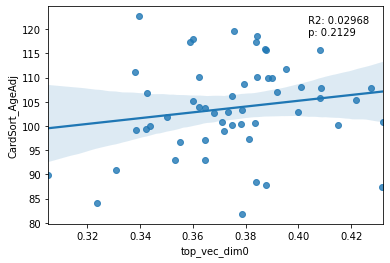

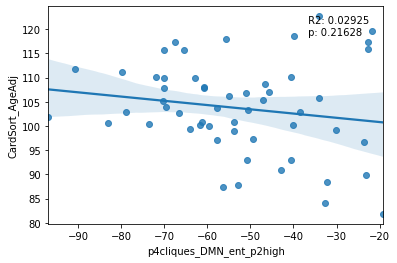

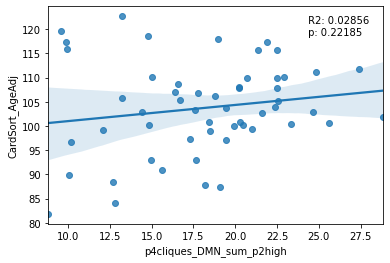


---------------- y = EF_AgeAdj ----------------

                          EF_AgeAdj
curv_ent_all_0.01          0.228156
bc_AUC_dim1                0.220562
curv_skew_FPN_0.01         0.195965
p4cliques_DMN_ent_p2high   0.186290
p4cliques_DMN_sum_p2high   0.182704


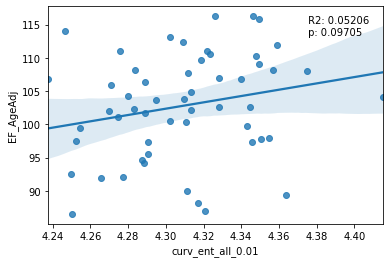

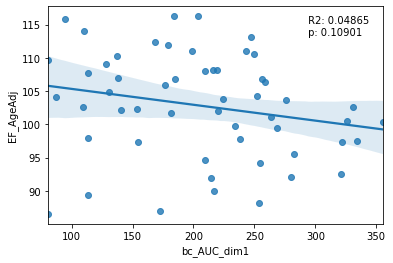

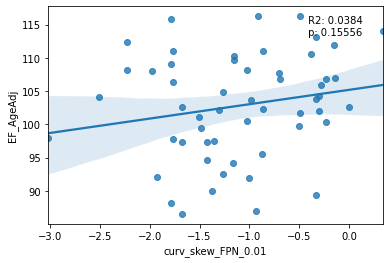

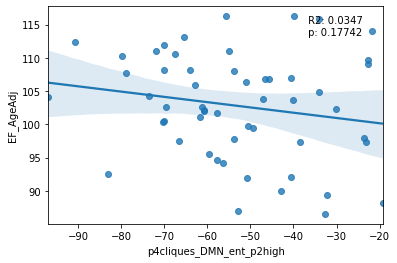

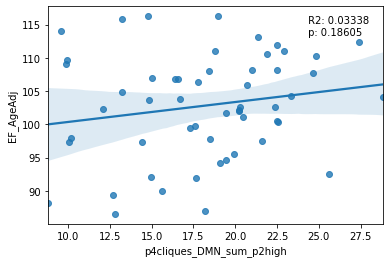

[None, None, None, None]

In [62]:
to_test = ['ListSort_AgeAdj',
           'Flanker_AgeAdj',
           'CardSort_AgeAdj',
           'EF_AgeAdj']
[get_best_predictors(tda_features, y, females, 5) for y in to_test]

# Example of best metrics from males in females

Shape old df: (44, 687)
Shape new df: (44, 687)


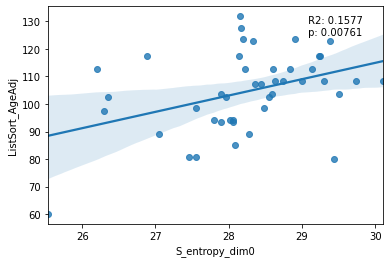

Shape old df: (54, 687)
Shape new df: (54, 687)


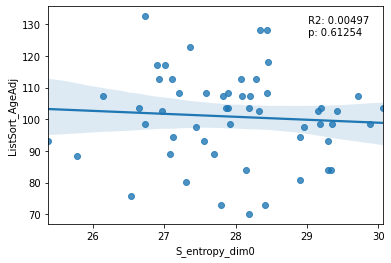

In [63]:
x = 'S_entropy_dim0'
y = 'ListSort_AgeAdj'
# regplot(x, y, males)
z_scored_regplot(x, y, males, cut_off=3, print_zscores = 0)
z_scored_regplot(x, y, females, cut_off=3, print_zscores = 0)

Shape old df: (44, 687)
Shape new df: (44, 687)


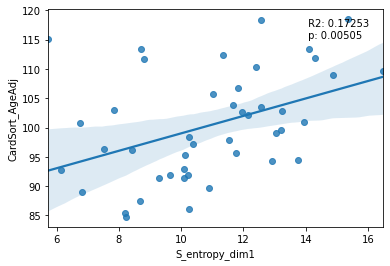

Shape old df: (54, 687)
Shape new df: (54, 687)


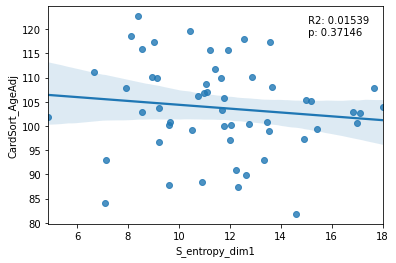

In [64]:
x = 'S_entropy_dim1'
y = 'CardSort_AgeAdj'
# regplot(x, y, males)
z_scored_regplot(x, y, males, cut_off=3, print_zscores = 0)
z_scored_regplot(x, y, females, cut_off=3, print_zscores = 0)

Shape old df: (44, 687)
Shape new df: (44, 687)


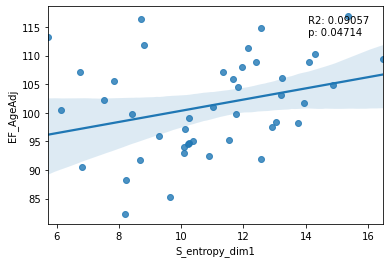

Shape old df: (54, 687)
Shape new df: (54, 687)


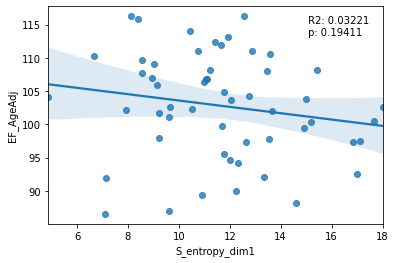

In [65]:
x = 'S_entropy_dim1'
y = 'EF_AgeAdj'
# regplot(x, y, males)
z_scored_regplot(x, y, males, cut_off=3, print_zscores = 0)
z_scored_regplot(x, y, females, cut_off=3, print_zscores = 0)

# Example of best metrics from females in males

Shape old df: (44, 687)
Shape new df: (44, 687)


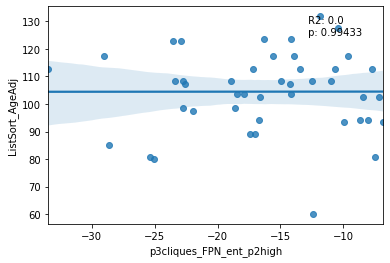

Shape old df: (54, 687)
Shape new df: (53, 687)


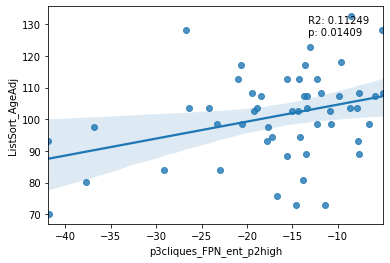

In [66]:
x = 'p3cliques_FPN_ent_p2high'
y = 'ListSort_AgeAdj'
# regplot(x, y, males)
z_scored_regplot(x, y, males, cut_off=3, print_zscores = 0)
z_scored_regplot(x, y, females, cut_off=3, print_zscores = 0)

Shape old df: (44, 687)
Shape new df: (44, 687)


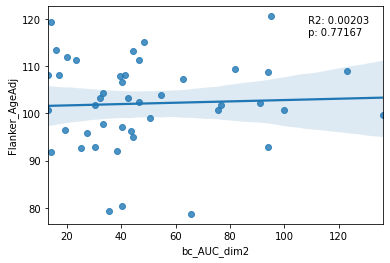

Shape old df: (54, 687)
Shape new df: (53, 687)


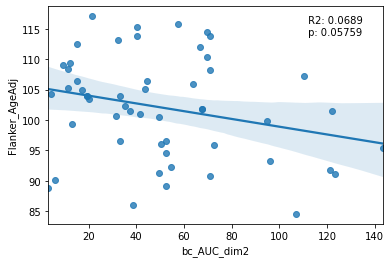

In [67]:
x = 'bc_AUC_dim2'
y = 'Flanker_AgeAdj'
# regplot(x, y, males)
z_scored_regplot(x, y, males, cut_off=3, print_zscores = 0)
z_scored_regplot(x, y, females, cut_off=3, print_zscores = 0)

Shape old df: (44, 687)
Shape new df: (44, 687)


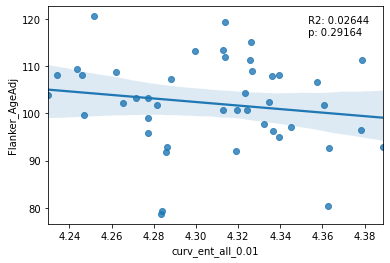

Shape old df: (54, 687)
Shape new df: (54, 687)


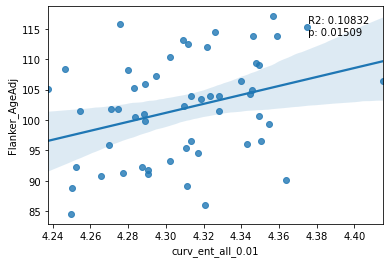

In [68]:
x = 'curv_ent_all_0.01'
y = 'Flanker_AgeAdj'
# regplot(x, y, males)
z_scored_regplot(x, y, males, cut_off=3, print_zscores = 0)
z_scored_regplot(x, y, females, cut_off=3, print_zscores = 0)